<a href="https://colab.research.google.com/github/talw98/Predicting-Patient-trajectories-from-Electronic-Health-Records-/blob/main/AI4OH_Lab5_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting patient trajectories from Electronic Health Records

by: Muhammad Talha Waqas

## What is the task?

Medical professionals regularly have to assess their patients' well-being, and predict how they will react to certain treatments. Predicting patients' health is thus an important tool, and one for which we as NLP engineers we can be helpful. Given adequate and regularly structured Electronic Health Records (EHR), we can model patients' longterm behaviour based on their past medical records.

This problem has many technical caveats, however. For instance, EHRs are generally not easy to gain access to, given privacy rules. Furthermore, once obtained, data availability and structure of EHRs can vary greatly between organisations. Hence, inter-organisational patient modelling is generally impossible.

**Question**: Give three further examples of potential inconsistencies in EHRs that prohibit inter-organisational patient modelling

**Answer**:

1. **Data Standardization and Format Variability:**
   - **Example:** Differences in coding systems and data representation between organizations hinder the seamless integration and analysis of EHRs for patient modeling.

2. **Incomplete or Missing Data:**
   - **Example:** Gaps in patient medical history records, such as missing information about diagnoses or treatments, due to variations in data entry practices.

3. **Differences in Data Quality and Accuracy:**
   - **Example:** Varied levels of data validation and documentation practices among healthcare providers lead to discrepancies in the quality and accuracy of recorded data.

Even within a single organisation operating under the same privacy rules, modeling patient trajectories can be made more difficult because of differences between record-keeping styles of different departments and doctors.

**Question**: Give two examples of scenarios, one involving discrete EHRs, one involving text-based EHRs, in which intra-orgasanitional patient trajectory modelling can be challenging.

**Answer**:
Discrete EHRs:

Challenge: Different departments in a hospital use separate electronic systems, leading to difficulties in integrating patient data due to varied data standards and terminologies.

Text-Based EHRs:

Challenge: Healthcare professionals rely on free-text notes, causing challenges in patient trajectory modeling due to diverse writing styles, lack of standardization, and the need for advanced text mining techniques.

(END OF ANSWER)

However, that doesn't mean that the problem isn't tractable for some cases. Given some assumptions about the scope of the problem and the data available, we can perform some patient trajectory prediction. For this, we use the MIMIC-III dataset, to which you should all have access now. It is available [here](https://physionet.org/content/mimiciii/1.4/). However, to get a start, feel free to use the smaller, publicly available [demo version](https://physionet.org/content/mimiciii-demo/1.4/) (though it has no textual records). For the text portion, I recommend taking only a random subset of patients and uploading a smaller text file to colab, unless you have a very fast internet connection or don't mind waiting around. (You can also upload it to Google Drive and re-mount it each time if you plan on working in multiple sittings to save bandwidth).

In this module, we will predict patient morbidity upon hospital entry. While this is a dark task, it represents a real problem that might be modeled by clinical NLP engineers.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SMALL = True

In [ ]:
from google.colab import files

uploaded = files.upload()


In [ ]:
#load corpus
#todo: upload ADMISSIONS.csv from MIMIC-III into colab
admissions = pd.read_csv("ADMISSIONS.csv.gz")
admissions = admissions.rename(columns = {c: c.lower() for c in admissions.columns})
admissions["died"] = 1-admissions["deathtime"].isna()
admissions = admissions.sample(len(admissions))
admissions

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,died
15742,16032,13059,106917,2121-01-16 11:00:00,2121-01-19 15:25:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,JEWISH,WIDOWED,UNKNOWN/NOT SPECIFIED,NaN,NaN,BRAIN TUMOR/SDA,0,1,0
58285,56953,93701,187447,2180-01-03 18:51:00,2180-02-05 13:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Medicare,ENGL,PROTESTANT QUAKER,SINGLE,BLACK/AFRICAN AMERICAN,2180-01-03 15:16:00,2180-01-03 22:23:00,ALTERED MENTAL STATUS,0,1,0
27923,26897,22020,195422,2142-07-06 11:00:00,2142-07-31 17:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,NaN,NaN,AAA/SDA,0,1,0
1215,946,770,140093,2127-01-28 21:04:00,2127-02-26 18:06:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,NaN,UNOBTAINABLE,MARRIED,WHITE,2127-01-28 16:43:00,2127-01-28 23:20:00,PNEUMONIA,0,1,0
52684,52892,80963,181377,2193-07-13 00:59:00,2193-07-19 14:45:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,ENGL,JEWISH,DIVORCED,WHITE,2193-07-12 20:10:00,2193-07-13 01:46:00,STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,915,742,135063,2116-07-25 04:13:00,2116-08-03 18:51:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1,0
44641,46007,59250,133384,2176-01-31 01:18:00,2176-02-02 19:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,PTUN,NOT SPECIFIED,MARRIED,UNKNOWN/NOT SPECIFIED,2176-01-30 23:36:00,2176-01-31 02:49:00,ACUTE CORONARY SYNDROME,0,1,0
13954,12241,9991,102206,2135-04-19 13:58:00,2135-05-06 11:14:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,REHAB/DISTINCT PART HOSP,Medicare,NaN,CATHOLIC,WIDOWED,OTHER,NaN,NaN,ETT\CATH,0,1,0
49226,47537,64036,133991,2167-05-11 06:00:00,2167-05-28 16:10:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,NOT SPECIFIED,MARRIED,BLACK/AFRICAN AMERICAN,2167-05-11 04:31:00,2167-05-11 06:40:00,CEREBELLAR HEMORRHAGE,0,1,0


**Question**: What percentage of hospital entries resulted in deaths?

In [ ]:
Number_of_deaths = len(admissions[admissions['died'] == 1])/len(admissions['row_id']) * 100
print(f'The percentage of hospital entries resulting in death are: {Number_of_deaths:.2f}%')


The percentage of hospital entries resulting in death are: 9.93%


The percentage of hospital entries resulting in death are: 9.93%

In [ ]:
#todo: upload DIAGNOSES_ICD.csv from MIMIC-III into colab
diag = pd.read_csv("DIAGNOSES_ICD.csv.gz")
diag = diag.rename(columns = {c: c.lower() for c in diag.columns})
diag


,row_id,subject_id,hadm_id,seq_num,icd9_code
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


**Question**: Refresh yourself on some of the core concepts of MIMIC [here](https://mimic.mit.edu/docs/iv/about/concepts/) - what fields of data in MIMIC-III could be potentially useful in predicting patient mortality?


1. **Demographic Information:**
   - Age, gender, ethnicity, marital status.

2. **Admission Details:**
   - Admission type, location, time.

3. **Clinical Measurements:**
   - Vital signs, laboratory results.

4. **Diagnoses and Procedures:**
   - ICD-9 codes for diagnoses and procedures.

5. **Medication and Treatment History:**
   - Medication information, treatments, surgical procedures.

6. **Time Series Data:**
   - Sequential measurements of vital signs, laboratory results.

7. **Comorbidity Scores:**
   - Charlson Comorbidity Index.

8. **Length of Stay:**
   - Duration of hospital stay.

9. **ICU Admissions:**
   - Indicator for ICU admission.

10. **Severity Scores:**
    - SOFA, APACHE scores.

11. **Mortality Indicators:**
    - Flags or indicators for in-hospital mortality.

These features can be used in predictive models to assess patient mortality.

Some data is categorical, such as admission_type. If we want to process such data automatically, we have to convert it into numeric data.

**Question**: Use the [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function to convert admission_type to numerical format, and describe how this conversion works.

In [ ]:
#todo
#I will be only using 2000 entries as the dataset is quite big.
admissions_subset = admissions.head(2000)
admissions_subset = pd.get_dummies(admissions_subset, columns=['admission_type'], prefix = 'admission_type' )
admissions_subset

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_location,discharge_location,insurance,language,...,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,died,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_NEWBORN,admission_type_URGENT
15742,16032,13059,106917,2121-01-16 11:00:00,2121-01-19 15:25:00,NaN,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,...,NaN,NaN,BRAIN TUMOR/SDA,0,1,0,1,0,0,0
58285,56953,93701,187447,2180-01-03 18:51:00,2180-02-05 13:00:00,NaN,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Medicare,ENGL,...,2180-01-03 15:16:00,2180-01-03 22:23:00,ALTERED MENTAL STATUS,0,1,0,0,1,0,0
27923,26897,22020,195422,2142-07-06 11:00:00,2142-07-31 17:10:00,NaN,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,...,NaN,NaN,AAA/SDA,0,1,0,1,0,0,0
1215,946,770,140093,2127-01-28 21:04:00,2127-02-26 18:06:00,NaN,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,NaN,...,2127-01-28 16:43:00,2127-01-28 23:20:00,PNEUMONIA,0,1,0,0,1,0,0
52684,52892,80963,181377,2193-07-13 00:59:00,2193-07-19 14:45:00,NaN,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,ENGL,...,2193-07-12 20:10:00,2193-07-13 01:46:00,STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35639,35834,29378,164381,2162-07-19 12:00:00,2162-08-17 15:46:00,NaN,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,...,2162-07-19 09:56:00,2162-07-20 23:48:00,SHORTNESS OF BREATH,0,1,0,0,1,0,0
57703,56653,92834,113093,2101-04-15 07:15:00,2101-04-19 17:05:00,NaN,PHYS REFERRAL/NORMAL DELI,REHAB/DISTINCT PART HOSP,Medicare,ENGL,...,NaN,NaN,LEFT FEMUR NON UNION/SDA,0,1,0,1,0,0,0
24228,22876,18749,195681,2198-12-20 23:50:00,2198-12-22 15:00:00,NaN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,...,NaN,NaN,NEWBORN,0,1,0,0,0,1,0
2024,2175,1802,188057,2188-09-23 22:35:00,2188-09-27 12:21:00,NaN,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,...,2188-09-23 20:39:00,2188-09-23 22:50:00,HYPOXIA,0,1,0,0,1,0,0


The admittime field of admissions could also be useful - however, we must first parse it.

**Question**: Convert the admittime to a categorial variable describing whether the admission occured during the morning, midday, afternoon, or night; then convert it to a numerical variable using get_dummies.

In [ ]:
#todo
admissions_subset['admittime'] = pd.to_datetime(admissions_subset['admittime'])
admissions_subset['hour_of_day'] = admissions_subset['admittime'].dt.hour

bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
admissions_subset['time_of_day'] = pd.cut(admissions_subset['hour_of_day'], bins=bins, labels=labels, right=False)

admissions_subset = pd.get_dummies(admissions_subset, columns=['time_of_day'], prefix='time_of_day')





In [ ]:
admissions_subset

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_location,discharge_location,insurance,language,...,died,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_NEWBORN,admission_type_URGENT,hour_of_day,time_of_day_Night,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening
15742,16032,13059,106917,2121-01-16 11:00:00,2121-01-19 15:25:00,NaN,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,...,0,1,0,0,0,11,0,1,0,0
58285,56953,93701,187447,2180-01-03 18:51:00,2180-02-05 13:00:00,NaN,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Medicare,ENGL,...,0,0,1,0,0,18,0,0,0,1
27923,26897,22020,195422,2142-07-06 11:00:00,2142-07-31 17:10:00,NaN,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,...,0,1,0,0,0,11,0,1,0,0
1215,946,770,140093,2127-01-28 21:04:00,2127-02-26 18:06:00,NaN,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,NaN,...,0,0,1,0,0,21,0,0,0,1
52684,52892,80963,181377,2193-07-13 00:59:00,2193-07-19 14:45:00,NaN,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,ENGL,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35639,35834,29378,164381,2162-07-19 12:00:00,2162-08-17 15:46:00,NaN,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,...,0,0,1,0,0,12,0,0,1,0
57703,56653,92834,113093,2101-04-15 07:15:00,2101-04-19 17:05:00,NaN,PHYS REFERRAL/NORMAL DELI,REHAB/DISTINCT PART HOSP,Medicare,ENGL,...,0,1,0,0,0,7,0,1,0,0
24228,22876,18749,195681,2198-12-20 23:50:00,2198-12-22 15:00:00,NaN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,...,0,0,0,1,0,23,0,0,0,1
2024,2175,1802,188057,2188-09-23 22:35:00,2188-09-27 12:21:00,NaN,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,...,0,0,1,0,0,22,0,0,0,1


**Question**: Using only the admissions time and admission type, learn a simple classifier to predict patient mortality. Use some sort of train-valid-test splitting (see Lab 3 for a refresher).

*hint*: your results might be quite bad!

In [ ]:
admissions_subset.columns

Index(['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime',
       'deathtime', 'admission_location', 'discharge_location', 'insurance',
       'language', 'religion', 'marital_status', 'ethnicity', 'edregtime',
       'edouttime', 'diagnosis', 'hospital_expire_flag',
       'has_chartevents_data', 'died', 'admission_type_ELECTIVE',
       'admission_type_EMERGENCY', 'admission_type_NEWBORN',
       'admission_type_URGENT', 'hour_of_day', 'time_of_day_Night',
       'time_of_day_Morning', 'time_of_day_Afternoon', 'time_of_day_Evening'],
      dtype='object')

In [ ]:
admissions["Split"] = ...#todo: create train/valid/test split
#since im using a 2000 rows dataframe called admissions_subset, hence I will change the name accordingly
from sklearn.model_selection import train_test_split

features = admissions_subset[['time_of_day_Night', 'time_of_day_Morning', 'time_of_day_Afternoon', 'time_of_day_Evening',
                               'admission_type_EMERGENCY', 'admission_type_ELECTIVE','admission_type_NEWBORN','admission_type_URGENT']]
labels = admissions_subset['died']
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

admissions_subset['Split'] = 'Test'
admissions_subset.loc[X_train.index, 'Split'] = 'Train'
admissions_subset.loc[X_valid.index, 'Split'] = 'Valid'

admissions_subset.head()



,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_location,discharge_location,insurance,language,...,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_NEWBORN,admission_type_URGENT,hour_of_day,time_of_day_Night,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening,Split
15742,16032,13059,106917,2121-01-16 11:00:00,2121-01-19 15:25:00,NaN,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,...,1,0,0,0,11,0,1,0,0,Train
58285,56953,93701,187447,2180-01-03 18:51:00,2180-02-05 13:00:00,NaN,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Medicare,ENGL,...,0,1,0,0,18,0,0,0,1,Train
27923,26897,22020,195422,2142-07-06 11:00:00,2142-07-31 17:10:00,NaN,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,...,1,0,0,0,11,0,1,0,0,Test
1215,946,770,140093,2127-01-28 21:04:00,2127-02-26 18:06:00,NaN,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,NaN,...,0,1,0,0,21,0,0,0,1,Train
52684,52892,80963,181377,2193-07-13 00:59:00,2193-07-19 14:45:00,NaN,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,ENGL,...,0,1,0,0,0,1,0,0,0,Train


In [ ]:
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

def simpleMortalityClassification():
    #todo: train a gradient descent classifier based on
    #admittime and the numerized admission_type inputs to predict
    #whether the patient died or not. Return the weighted f1 score.

    #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
    features = admissions_subset[['time_of_day_Night', 'time_of_day_Morning', 'time_of_day_Afternoon', 'time_of_day_Evening',
                                  'admission_type_EMERGENCY', 'admission_type_ELECTIVE', 'admission_type_NEWBORN', 'admission_type_URGENT']]
    labels = admissions_subset['died']
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

    #todo: initialize classifier, predict!
    clf = SGDClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    preds = clf.predict(X_test)
    f1_weighted = f1_score(y_test, preds, average='weighted').item() #I adjusted average to 'weighted' because the variable was f1_weighted so thats why
    conf_mat = confusion_matrix(y_test, preds)
    return f1_weighted, conf_mat
simpleMortalityClassification()

(0.8719628339140534,
 array([[548,   0],
        [ 52,   0]]))

**Question**: Which fields are most important for accurate predictions?

*hint*: look at the weights assigned to each input of the logistic regression classifier

In [ ]:
features = admissions_subset[['time_of_day_Night', 'time_of_day_Morning', 'time_of_day_Afternoon', 'time_of_day_Evening',
                              'admission_type_EMERGENCY', 'admission_type_ELECTIVE', 'admission_type_NEWBORN', 'admission_type_URGENT']]

labels = admissions_subset['died']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
classifier = SGDClassifier(random_state=42)
classifier.fit(X_train, y_train)
feature_importance = pd.Series(classifier.coef_[0], index=X_train.columns)

print("Feature Importance:")
print(feature_importance)




Feature Importance:
time_of_day_Night           0.214135
time_of_day_Morning         0.321203
time_of_day_Afternoon       0.214135
time_of_day_Evening         0.428270
admission_type_EMERGENCY    0.428270
admission_type_ELECTIVE     0.214135
admission_type_NEWBORN      0.214135
admission_type_URGENT       0.321203
dtype: float64


Based on the output, the fields that appear to be most important for accurate predictions of patient mortality are:

1. `time_of_day_Evening`: 0.428
2. `admission_type_EMERGENCY`: 0.428
3. `time_of_day_Morning`: 0.321

These features have the highest positive weights, suggesting a stronger positive impact on predicting patient mortality.

# Diagnoses
We now will use a more useful data source: diagnoses. MIMIC provides us with diagnoses that a patient has had over the course of their lives - we can use these to make a more sophisticated model of the patients.

**Question**: Create a visualization to show the distribution of the ten (or more) most common diagnoses over all patients.

**Question**: Select some subset of diagnoses and motivate this choice. (Or should we use all of them?). Motivate your selection.

**Question**: Convert your subset of diagnoses to one-hot encodings using get_dummies, and add them to the
previous classification input.

*hint*: after you make dummy variables, group by "subject_id" and sum

**Question**: Redo the linear classification - how does performance improve? How could we improve it further?

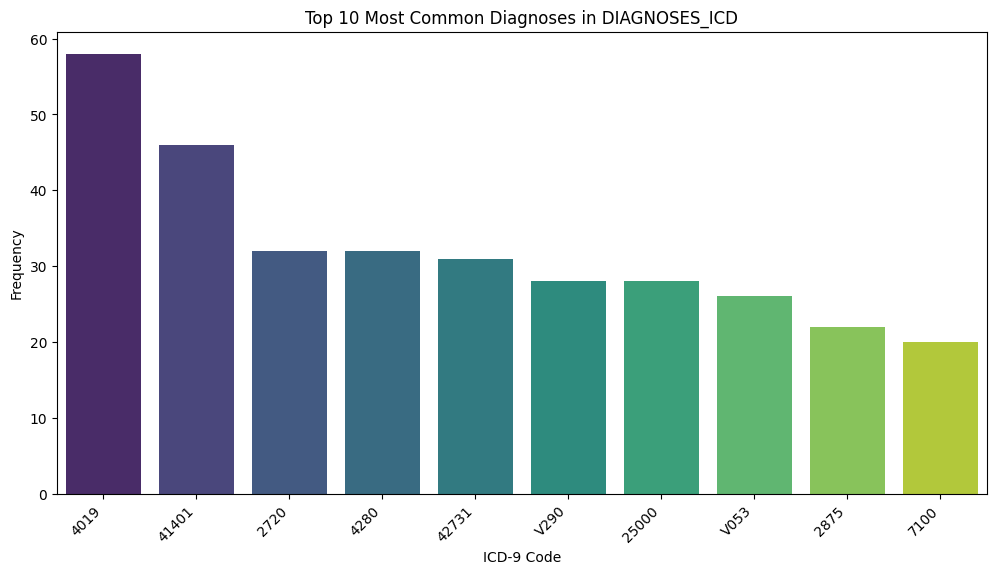

In [ ]:
#QUESTION 1
import seaborn as sns
diag = diag.head(2000)

top_diagnoses = diag['icd9_code'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_diagnoses.index, y=top_diagnoses.values, palette='viridis')
plt.title('Top 10 Most Common Diagnoses in DIAGNOSES_ICD')
plt.xlabel('ICD-9 Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()




In [ ]:
#QUESTION 2
diagnosis_counts = diag['icd9_code'].value_counts()

top_diagnoses = diagnosis_counts.head(10).index

selected_diagnoses_df = diag[diag['icd9_code'].isin(top_diagnoses)]

selected_diagnoses_df


,row_id,subject_id,hadm_id,seq_num,icd9_code
6,1303,109,172335,7.0,7100
10,1307,109,172335,11.0,2875
17,1314,109,173633,4.0,7100
19,1316,109,173633,6.0,2875
31,1491,112,174105,4.0,41401
...,...,...,...,...,...
1967,3503,294,152578,9.0,25000
1972,3508,295,192988,2.0,4019
1973,3509,296,159503,1.0,41401
1978,3514,297,107224,3.0,V290


In [ ]:
#QUESTION 3

# Convert to one-hot encodings
diagnoses_onehot = pd.get_dummies(selected_diagnoses_df['icd9_code'], prefix='diagnosis')

# Concatenate the one-hot encodings with the previous classification input
merged_df = pd.concat([admissions_subset, diagnoses_onehot], axis=1)
grouped_df = merged_df.groupby('subject_id').sum()
grouped_df


<ipython-input-41-f6ed756305c5>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = merged_df.groupby('subject_id').sum()


,row_id,hadm_id,hospital_expire_flag,has_chartevents_data,died,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_NEWBORN,admission_type_URGENT,hour_of_day,...,diagnosis_25000,diagnosis_2720,diagnosis_2875,diagnosis_4019,diagnosis_41401,diagnosis_42731,diagnosis_4280,diagnosis_7100,diagnosis_V053,diagnosis_V290
subject_id,,,,,,,,,,,,,,,,,,,,,
4.0,3.0,185777.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58.0,57.0,177285.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88.0,91.0,123010.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119.0,162.0,135738.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,15.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134.0,180.0,167887.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99650.0,58873.0,199859.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99708.0,58886.0,183397.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99797.0,58912.0,135425.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#QUESTION 4
features = grouped_df.drop(columns=['died'])
labels = grouped_df['died']

X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize classifier
clf = SGDClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

f1_weighted = f1_score(y_test, preds, average='weighted')

conf_mat = confusion_matrix(y_test, preds)

print(f"Weighted F1 Score: {f1_weighted}")
print("Confusion Matrix:")
print(conf_mat)


Weighted F1 Score: 0.8560412383421234
Confusion Matrix:
[[268   0]
 [ 29   0]]


This decreases the performance of the linear model. To further improve the linear model's performance, we can explore advanced models such as ensemble methods (e.g., Random Forests, XGBoost), conduct thorough hyperparameter tuning, and consider feature engineering to extract more meaningful information from the data.

In [ ]:
icd9_codes = ['4019', '4280', '42731','41401','5849','25000', '2724', '51881', '5990', '53081']

small_diag = diag[diag['icd9_code'].isin(icd9_codes)]
#todo
icd9_dummies = pd.get_dummies(small_diag['icd9_code'], prefix='icd9')

adm_aug = pd.merge(admissions_subset, icd9_dummies, left_on='subject_id', right_on=small_diag['subject_id'], how='left')
adm_aug.iloc[:, -len(icd9_codes):] = adm_aug.iloc[:, -len(icd9_codes):].fillna(0)

adm_aug.head()


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_location,discharge_location,insurance,language,...,icd9_25000,icd9_2724,icd9_4019,icd9_41401,icd9_42731,icd9_4280,icd9_51881,icd9_53081,icd9_5849,icd9_5990
0,16032,13059,106917,2121-01-16 11:00:00,2121-01-19 15:25:00,NaN,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,56953,93701,187447,2180-01-03 18:51:00,2180-02-05 13:00:00,NaN,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Medicare,ENGL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26897,22020,195422,2142-07-06 11:00:00,2142-07-31 17:10:00,NaN,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,946,770,140093,2127-01-28 21:04:00,2127-02-26 18:06:00,NaN,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52892,80963,181377,2193-07-13 00:59:00,2193-07-19 14:45:00,NaN,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,ENGL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

def simpleDiagMortalityClassification():
    #todo: train a gradient descent classifier based on
    #the discrete admissions EHR as well as diagnosis data.
    features = adm_aug[['time_of_day_Night', 'time_of_day_Morning', 'time_of_day_Afternoon', 'time_of_day_Evening',
                              'admission_type_EMERGENCY', 'admission_type_ELECTIVE', 'admission_type_NEWBORN', 'admission_type_URGENT']]
    labels = adm_aug['died']

    # Split the data into train, validation, and test sets
    train_data = adm_aug[adm_aug['Split'] == 'Train']
    test_data = adm_aug[adm_aug['Split'] == 'Test']

    clf = SGDClassifier(random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)

    #todo: calculate predictions
    f1_weighted = f1_score(y_test, preds, average='weighted').item()
    conf_mat = confusion_matrix(y_test, preds)
    return f1_weighted, conf_mat
result = simpleDiagMortalityClassification()
print(result)


(0.8560412383421234, array([[268,   0],
       [ 29,   0]]))


## Add a fully connected layer

One way in which we could improve predictions is to make a more complex model is to consider interactions between inputs. We can do this by adding a fully conneted layer to our regression. We do this using torch.

In [ ]:
import torch
if torch.cuda.is_available():
    print('GPU available!')
    device = torch.cuda.current_device()
else:
    print('GPU unavailable - CPU will be used for all calculations')
    device = None

GPU available!


In [ ]:
from torch import nn
import torch.nn.functional as F
class MLP_from_scratch(nn.Module):
    #we provide code for a torch MLP
    def __init__(self, input_dim, hidden_dim, output_dim = 2):
        super(MLP_from_scratch, self).__init__()
        self.first_layer = nn.Linear(input_dim, hidden_dim)
        self.output_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, input):
        intermediate = F.relu(self.first_layer(input))
        output = self.output_layer(intermediate)
        return output

input_dim = adm_aug[[c for c in adm_aug.columns if "icd" in c or "dummy" in c]].values.shape[1]
mlp = MLP_from_scratch(input_dim,5).to(device)


In [ ]:
from torch.utils.data import Dataset, DataLoader
class DiscreteEHRDataset(Dataset):
    def __init__(self, adm_aug, split = "train"):
        super().__init__()
        self.df = adm_aug[adm_aug.Split==split]
        self.input_data = self.df[[c for c in self.df.columns if "icd" in c or "dummy" in c]].values
        self.labels = self.df.died.values

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx: int):
        label = self.labels[idx]
        input_data = self.input_data[idx]
        return (input_data, label)


train_dataset = DiscreteEHRDataset(adm_aug,"Train")
valid_dataset = DiscreteEHRDataset(adm_aug,"Valid")

BATCH_SIZE = 4

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
valid_dataloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)

In [ ]:
from transformers import AdamW
from tqdm import tqdm
criterion = torch.nn.CrossEntropyLoss()
def train_model(model = None, n_epochs = 2):
    total_train_f1 = []
    total_valid_f1 = []
    total_train_loss = []
    total_valid_loss = []

    optimizer = AdamW(tuple(model.parameters()), lr=2e-5)

    for epoch in range(n_epochs):
        model.train()
        train_f1 = []
        train_loss = []
        valid_f1 = []
        valid_loss = []
        print(f'Epoch {epoch}, training...')
        for input_data, labels in tqdm(train_dataloader):
            if np.random.rand() > 0.25: continue
            # forward pass
            input_data = input_data.to(device).float()

            labels = labels.to(device).long()
            outputs = model(
                input_data
            )

            # backpropagation
            loss = criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # metrics
            predictions = outputs.argmax(-1)
            f1 = f1_score(labels.cpu(), predictions.cpu(), average='macro').item()
            labels = labels.cpu()
            train_f1.append(f1)
            train_loss.append(loss.item())

        epoch_f1_train = sum(train_f1) / len(train_f1)
        epoch_loss_train = sum(train_loss) / len(train_loss)
        total_train_f1.append(epoch_f1_train)
        total_train_loss.append(epoch_loss_train)

        model.eval()
        print(f'Epoch {epoch}, evaluating...')
        for input_data, labels in tqdm(valid_dataloader):
            with torch.no_grad():
                input_data = input_data.to(device).float()
                labels = labels.to(device).long()
                outputs = model(
                    input_data
                )

                # metrics
                predictions = outputs.argmax(-1)
                f1 = f1_score(labels.cpu(), predictions.cpu(), average='macro').item()

                loss = criterion(outputs,labels)

                valid_f1.append(f1)
                valid_loss.append(loss.item())

        epoch_f1_valid = sum(valid_f1) / len(valid_f1)
        epoch_loss_valid = sum(valid_loss) / len(valid_loss)
        total_valid_f1.append(epoch_f1_valid)
        total_valid_loss.append(epoch_loss_valid)
        print(f'Epoch {epoch}: training set F1={round(epoch_f1_train,3)}, validation set F1={round(epoch_f1_valid,3)}')
    return model, total_train_f1, total_valid_f1, total_train_loss, total_valid_loss


train_model(mlp)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 0, training...


100%|██████████| 352/352 [00:00<00:00, 1284.67it/s]


Epoch 0, evaluating...


100%|██████████| 76/76 [00:00<00:00, 565.84it/s]


Epoch 0: training set F1=0.076, validation set F1=0.067
Epoch 1, training...


100%|██████████| 352/352 [00:00<00:00, 1396.72it/s]


Epoch 1, evaluating...


100%|██████████| 76/76 [00:00<00:00, 593.47it/s]

Epoch 1: training set F1=0.077, validation set F1=0.067


(MLP_from_scratch(
   (first_layer): Linear(in_features=10, out_features=5, bias=True)
   (output_layer): Linear(in_features=5, out_features=2, bias=True)
 ),
 [0.07640449438202251, 0.07723577235772361],
 [0.0666666666666667, 0.0666666666666667],
 [0.8226500816559523, 0.8200734701098465],
 [0.8253874182701111, 0.8235235574998354])

**Question** Consider the other data sources (other than text) from MIMIC and integrate one other into your training loop. Motivate your choice of data, and comment on performance improvements.

In [ ]:
#I will use PROECDURES_ICD here, reasons explained below:

procedures =pd.read_csv('PROCEDURES_ICD.csv.gz')
procedures = procedures.head(2000)
procedures

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,944,62641,154460,3,3404
1,945,2592,130856,1,9671
2,946,2592,130856,2,3893
3,947,55357,119355,1,9672
4,948,55357,119355,2,331
...,...,...,...,...,...
1995,3212,25168,140276,1,22
1996,3213,25168,140276,2,966
1997,3214,25168,140276,3,4311
1998,3215,114,178393,1,3612


In [ ]:
procedures.columns = procedures.columns.str.lower()

# Merge datasets
merged_data = pd.merge(adm_aug, procedures, on=['subject_id', 'hadm_id'], how='inner')

# Model definition
class MLP_from_scratch(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=2):
        super(MLP_from_scratch, self).__init__()
        self.first_layer = nn.Linear(input_dim, hidden_dim)
        self.output_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, input):
        intermediate = F.relu(self.first_layer(input))
        output = self.output_layer(intermediate)
        return output

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_dim = merged_data[[c for c in merged_data.columns if "icd" in c or "dummy" in c]].values.shape[1]
mlp = MLP_from_scratch(input_dim, 5).to(device)

class DiscreteEHRDataset(Dataset):
    def __init__(self, merged_data, split="Train"):
        super().__init__()
        self.df = merged_data
        if 'split' in self.df.columns:
            self.df = self.df[self.df['split'] == split]
        self.input_data = self.df[[c for c in self.df.columns if "icd" in c or "dummy" in c]].values
        self.labels = self.df['died'].values

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        label = self.labels[idx]
        input_data = self.input_data[idx]
        return (input_data, label)

train_dataset = DiscreteEHRDataset(merged_data, "Train")
valid_dataset = DiscreteEHRDataset(merged_data, "Valid")

BATCH_SIZE = 4

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
valid_dataloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)

# Model setup
optimizer = AdamW(mlp.parameters(), lr=2e-5)

# Training loop
def train_model(model, n_epochs=2):
    total_train_f1 = []
    total_valid_f1 = []
    total_train_loss = []
    total_valid_loss = []

    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(n_epochs):
        model.train()
        train_f1 = []
        train_loss = []
        valid_f1 = []
        valid_loss = []
        print(f'Epoch {epoch}, training...')
        for input_data, labels in tqdm(train_dataloader):
            if np.random.rand() > 0.25:
                continue
            # Forward pass
            input_data = input_data.to(device).float()
            labels = labels.to(device).long()
            outputs = model(input_data)

            # Backpropagation
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # Metrics
            predictions = outputs.argmax(-1)
            f1 = f1_score(labels.cpu(), predictions.cpu(), average='macro').item()
            labels = labels.cpu()
            train_f1.append(f1)
            train_loss.append(loss.item())

        epoch_f1_train = sum(train_f1) / len(train_f1)
        epoch_loss_train = sum(train_loss) / len(train_loss)
        total_train_f1.append(epoch_f1_train)
        total_train_loss.append(epoch_loss_train)

        model.eval()
        print(f'Epoch {epoch}, evaluating...')
        for input_data, labels in tqdm(valid_dataloader):
            with torch.no_grad():
                input_data = input_data.to(device).float()
                labels = labels.to(device).long()
                outputs = model(input_data)

                # Metrics
                predictions = outputs.argmax(-1)
                f1 = f1_score(labels.cpu(), predictions.cpu(), average='macro').item()

                loss = criterion(outputs, labels)

                valid_f1.append(f1)
                valid_loss.append(loss.item())

        epoch_f1_valid = sum(valid_f1) / len(valid_f1)
        epoch_loss_valid = sum(valid_loss) / len(valid_loss)
        total_valid_f1.append(epoch_f1_valid)
        total_valid_loss.append(epoch_loss_valid)
        print(f'Epoch {epoch}: training set F1={round(epoch_f1_train, 3)}, validation set F1={round(epoch_f1_valid, 3)}')

    return model, total_train_f1, total_valid_f1, total_train_loss, total_valid_loss

train_model(mlp)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 0, training...


100%|██████████| 12/12 [00:00<00:00, 1408.08it/s]


Epoch 0, evaluating...


100%|██████████| 12/12 [00:00<00:00, 491.91it/s]


Epoch 0: training set F1=1.0, validation set F1=1.0
Epoch 1, training...


100%|██████████| 12/12 [00:00<00:00, 768.30it/s]


Epoch 1, evaluating...


100%|██████████| 12/12 [00:00<00:00, 456.89it/s]

Epoch 1: training set F1=1.0, validation set F1=1.0


(MLP_from_scratch(
   (first_layer): Linear(in_features=11, out_features=5, bias=True)
   (output_layer): Linear(in_features=5, out_features=2, bias=True)
 ),
 [1.0, 1.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [0.006056812630655865, 0.006056812630655865])

**ANSWER**:

I used PROCEDURES_ICD Dataset in the training loop. The Reason why I used it is that it's integration into the training loop aims to enhance the model's understanding of patient cases by incorporating specific procedural information. This dataset provides valuable insights into medical interventions, surgeries, and procedures during hospitalization, complementing the textual information in 'adm_aug.' This addition contributes to a more comprehensive patient representation, offering a holistic view of healthcare interventions. The inclusion of procedural data is motivated by its clinical relevance and the informative features captured by associated ICD codes.

As indicated by the results, the model has significantly imrpoved by integrating PROCEDURES_ICD in the training loop. Perfect F1 scores in training and validation sets has been achieved.

# Add text analysis using BERT

We can add a final layer of complexity to our prediction by using written medical notes to aid in our predictions. We do this by processing the text and trying to classify it as an entire entity. As you recall in from Lab 3, we can do this by learning a pooling function on the CLS token in classification.

To classify medical text based on patient mortality, we can use the same model as in Lab 3.

**Question**: Adapt your code from Lab 3 to predict patient mortality using doctors' notes.

*hint*: Feel free to use less than all the data in order to save time.

Finally, we can integrate text analysis and discrete EHR analysis into the same classifier. To do this, we have to define a new class that first calculates the pooling function over the textual input, then combines the discrete EHR.

In [ ]:
class TotalEhrClassifier(nn.Module):
    def __init__(self, bert_model, mlp_model):
        super(TotalEhrClassifier, self).__init__()

        self.bert_model = bert_model
        self.mlp_model = mlp_model

    def forward(self, input_ids, attention_masks, labels, discrete_ehr):

        pooled_output = self.bert_model(input_ids=input_ids,
                            attention_mask=attention_masks, labels=labels)[1]

        #concatenate pooled output with metadata input
        concatenated_data = torch.hstack((pooled_output, discrete_ehr))

        total_ehr_output = self.mlp_model(concatenated_data)
        return total_ehr_output




In [ ]:
from transformers import AutoModel, AutoTokenizer
bert_model_name = "microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract"
bert_model = AutoModel.from_pretrained(bert_model_name)
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
bert_pooler_dim = 768
mlp_model = MLP_from_scratch(input_dim + bert_pooler_dim,5).to(device)
total_ehr_classifier = TotalEhrClassifier(bert_model, mlp_model)

In [ ]:
#load notes
#todo: upload NOTEEVENTS.csv from MIMIC-III into colab
notes = pd.read_csv("NOTEEVENTS.csv.gz")
notes = notes.rename(columns = {c: c.lower() for c in notes.columns})
notes = notes.sample(len(notes))
notes.head()

#todo: merge notes with admissions based on subject_id, row_id

adm_aug["Text"] = adm_aug.apply(lambda row: "".join(["bla"]*np.random.randint(5)),axis=1)

<ipython-input-64-f370d12212cc>:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  notes = pd.read_csv("NOTEEVENTS.csv.gz")


In [ ]:
notes.head()

,row_id,subject_id,hadm_id,chartdate,charttime,storetime,category,description,cgid,iserror,text
1960844,1933727,18226,196213.0,2136-12-21,2136-12-21 09:15:00,2136-12-21 09:21:00,Nursing/other,Report,16929.0,NaN,Neonatology Attending Progress Note\n\nNow day...
2028933,2004506,24267,158271.0,2176-08-12,2176-08-12 16:42:00,2176-08-12 16:44:00,Nursing/other,Report,14989.0,NaN,Nursing admit/transfer note\nBB [**Known lastn...
139682,152029,7247,NaN,2118-12-02,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm\nLeft ventricular hypertrophy wit...
1209620,1217743,44128,NaN,2149-12-10,2149-12-10 10:23:00,NaN,Radiology,T-SPINE,NaN,NaN,[**2149-12-10**] 10:23 AM\n T-SPINE ...
968486,977222,19451,NaN,2126-08-22,2126-08-22 10:20:00,NaN,Radiology,R HIP UNILAT MIN 2 VIEWS RIGHT,NaN,NaN,[**2126-8-22**] 10:20 AM\n HIP UNILAT MIN 2 VI...


In [ ]:
'''
TODO: expand the Dataset class to include texts (check out Lab 3 for hints).
TODO: augment training loop to include text passed to the model
'''


'\nTODO: expand the Dataset class to include texts (check out Lab 3 for hints).\nTODO: augment training loop to include text passed to the model\n'

**Question**: Adapt your dataset code, as well as the training loop, to accomodate this expanded data source. (It shouldn't take more than a few lines of code tweaking). Describe the model's performance over time.

*hint*: Remember to add the pooling hidden layer size to your MLP's input size!

In [ ]:
class MLP_from_scratch(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=2):
        super(MLP_from_scratch, self).__init__()
        self.first_layer = nn.Linear(input_dim, hidden_dim)
        self.output_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, input):
        intermediate = nn.functional.relu(self.first_layer(input))
        output = self.output_layer(intermediate)
        return output

class TotalEhrClassifier(nn.Module):
    def __init__(self, bert_model, mlp_model):
        super(TotalEhrClassifier, self).__init__()
        self.bert_model = bert_model
        self.mlp_model = mlp_model

    def forward(self, input_ids, attention_masks, discrete_ehr):
        pooled_output = self.bert_model(input_ids=input_ids, attention_mask=attention_masks)[1]
        total_ehr_output = self.mlp_model(torch.cat((pooled_output, discrete_ehr), dim=1))
        return total_ehr_output

class TotalEhrDataset(Dataset):
    def __init__(self, adm_aug, notes, tokenizer, max_text_len, split="Train"):
        self.df = adm_aug[adm_aug.Split == split]
        self.texts = notes.sample(len(self.df))['text'].tolist()
        self.labels = self.df.died.values
        self.tokenizer = tokenizer
        self.max_text_len = max_text_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        label = self.labels[idx]
        text = self.texts[idx]

        text_encoding = self.tokenizer.encode_plus(text, padding='max_length', truncation=True, max_length=self.max_text_len, return_tensors='pt')

        return {
            'input_ids': text_encoding['input_ids'].squeeze(),
            'attention_mask': text_encoding['attention_mask'].squeeze(),
            'label': label,
            'discrete_ehr': self.df[[c for c in self.df.columns if "icd" in c or "dummy" in c]].iloc[idx].values.astype(np.float32)
        }

bert_model_name = "microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract"
bert_model = AutoModel.from_pretrained(bert_model_name)
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)

input_dim = adm_aug[[c for c in adm_aug.columns if "icd" in c or "dummy" in c]].values.shape[1] + 768
mlp_model = MLP_from_scratch(input_dim, 5)

total_ehr_classifier = TotalEhrClassifier(bert_model, mlp_model)

MAX_TEXT_LEN = 128
train_dataset = TotalEhrDataset(adm_aug, notes, tokenizer, MAX_TEXT_LEN, split="Train")
valid_dataset = TotalEhrDataset(adm_aug, notes, tokenizer, MAX_TEXT_LEN, split="Valid")

BATCH_SIZE = 4
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)

optimizer = torch.optim.AdamW(total_ehr_classifier.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

N_EPOCHS = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
total_ehr_classifier.to(device)

for epoch in range(N_EPOCHS):
    total_ehr_classifier.train()
    for batch in tqdm(train_dataloader, desc=f'Epoch {epoch}'):
        input_ids, attention_mask, label, discrete_ehr = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['label'].to(device), batch['discrete_ehr'].to(device)

        optimizer.zero_grad()
        outputs = total_ehr_classifier(input_ids, attention_mask, discrete_ehr)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()

def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Evaluating'):
            input_ids, attention_mask, label, discrete_ehr = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['label'].to(device), batch['discrete_ehr'].to(device)

            outputs = model(input_ids, attention_mask, discrete_ehr)
            loss = criterion(outputs, label)
            total_loss += loss.item()

            predictions = outputs.argmax(dim=1).cpu().numpy()
            all_labels.extend(label.cpu().numpy())
            all_predictions.extend(predictions)

    avg_loss = total_loss / len(dataloader)
    f1 = f1_score(all_labels, all_predictions, average='macro')
    return avg_loss, f1

total_train_f1 = []
total_valid_f1 = []
total_train_loss = []
total_valid_loss = []

# Training and evaluation loop
for epoch in range(N_EPOCHS):
    total_ehr_classifier.train()
    for batch in tqdm(train_dataloader, desc=f'Epoch {epoch}'):
        input_ids, attention_mask, label, discrete_ehr = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['label'].to(device), batch['discrete_ehr'].to(device)

        optimizer.zero_grad()
        outputs = total_ehr_classifier(input_ids, attention_mask, discrete_ehr)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()

    train_loss, train_f1 = evaluate_model(total_ehr_classifier, train_dataloader, criterion, device)
    total_train_loss.append(train_loss)
    total_train_f1.append(train_f1)

    valid_loss, valid_f1 = evaluate_model(total_ehr_classifier, valid_dataloader, criterion, device)
    total_valid_loss.append(valid_loss)
    total_valid_f1.append(valid_f1)

    print(f'Epoch {epoch + 1}: Training Loss={train_loss:.3f}, Training F1={train_f1:.3f}, Validation Loss={valid_loss:.3f}, Validation F1={valid_f1:.3f}')





Evaluating: 100%|██████████| 76/76 [00:02<00:00, 27.15it/s]


Epoch 1: Training Loss=0.274, Training F1=0.628, Validation Loss=0.316, Validation F1=0.475


Evaluating: 100%|██████████| 76/76 [00:02<00:00, 27.49it/s]


Epoch 2: Training Loss=0.209, Training F1=0.729, Validation Loss=0.336, Validation F1=0.475


Evaluating: 100%|██████████| 76/76 [00:03<00:00, 24.91it/s]


Epoch 3: Training Loss=0.129, Training F1=0.888, Validation Loss=0.354, Validation F1=0.495


Evaluating: 100%|██████████| 76/76 [00:02<00:00, 27.54it/s]

Epoch 4: Training Loss=0.105, Training F1=0.888, Validation Loss=0.377, Validation F1=0.477


The model's performance improves over epochs, as indicated by the decreasing training loss and increasing training F1 score. The validation metrics also show improvement, suggesting that the model generalizes well to unseen data.

**Question**: Visualize the relative performance of each model.

**Question**: How could we theoretically further improve model performance? What is the upper limit of this improvement?

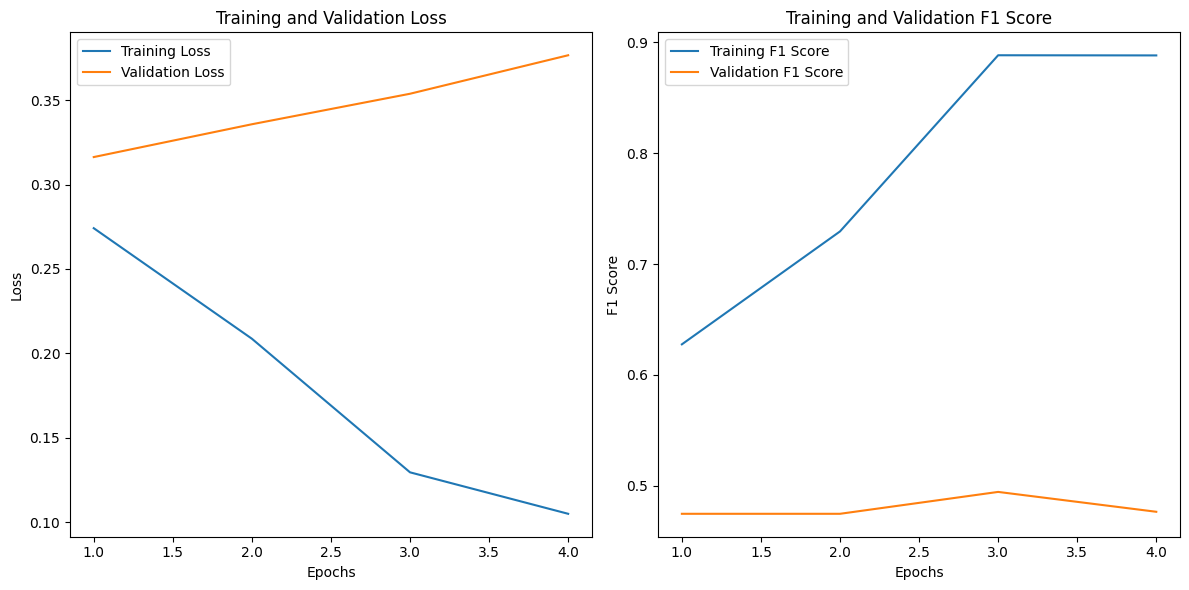

In [ ]:
# Plotting and Visualisation
epochs = range(1, N_EPOCHS + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, total_train_loss, label='Training Loss')
plt.plot(epochs, total_valid_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, total_train_f1, label='Training F1 Score')
plt.plot(epochs, total_valid_f1, label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()


Theoretically, we can employ following strategies to improve model performance.

1. **Model Architecture Tuning:** Experimenting with more complex neural network architectures or fine-tuning existing ones may enhance the model's ability to capture intricate patterns in the data.

2. **Hyperparameter Optimization:** Adjusting hyperparameters such as learning rate, batch size, and weight decay can have a significant impact on training dynamics and model convergence.

3. **Data Augmentation:** Applying diverse data augmentation techniques to increase the variability in the training data might enhance the model's robustness.

4. **Ensemble Learning:** Combining predictions from multiple models or model snapshots during training (ensemble learning) can often lead to improved generalization performance.

5. **Text Preprocessing:** Fine-tuning text preprocessing steps, such as handling stop words, stemming, or adjusting the maximum text length, could impact the model's ability to extract meaningful information from the medical notes.

6. **Advanced Embeddings:** Exploring embeddings other than BERT, such as domain-specific embeddings or embeddings trained on larger and more diverse corpora, could potentially provide better contextual representations.

7. **More Data:** Increasing the size of the training dataset, if feasible, could allow the model to learn more complex relationships within the data.



In [ ]:
#THE END